In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#data preprocessing
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [13]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [14]:
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [15]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [19]:
#data splitting into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop(columns=['User ID','Purchased'])
y = df['Purchased']

In [20]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
#standardise the data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
#Model Selection
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [30]:
#computing confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [31]:
matrix = confusion_matrix(y_test,pred,labels=model.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

[[50  2]
 [ 7 21]]


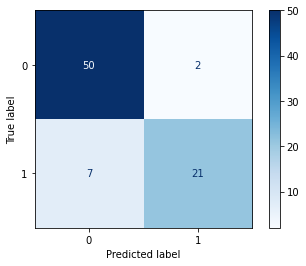

In [32]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=model.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [36]:
print('Accuracy',accuracy)
print('Classification Report: ')
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))

Accuracy 0.8875
Classification Report: 
Error Rate:  0.1125
Sensitivity (Recall or True positive rate) : 0.75
Specificity (True negative rate) : 0.9615384615384616
Precision (Positive predictive value) : 0.9130434782608695
False Positive Rate : 0.038461538461538464
